<a href="https://colab.research.google.com/github/njafarov/Optimization_LP/blob/main/ChallengeProblem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

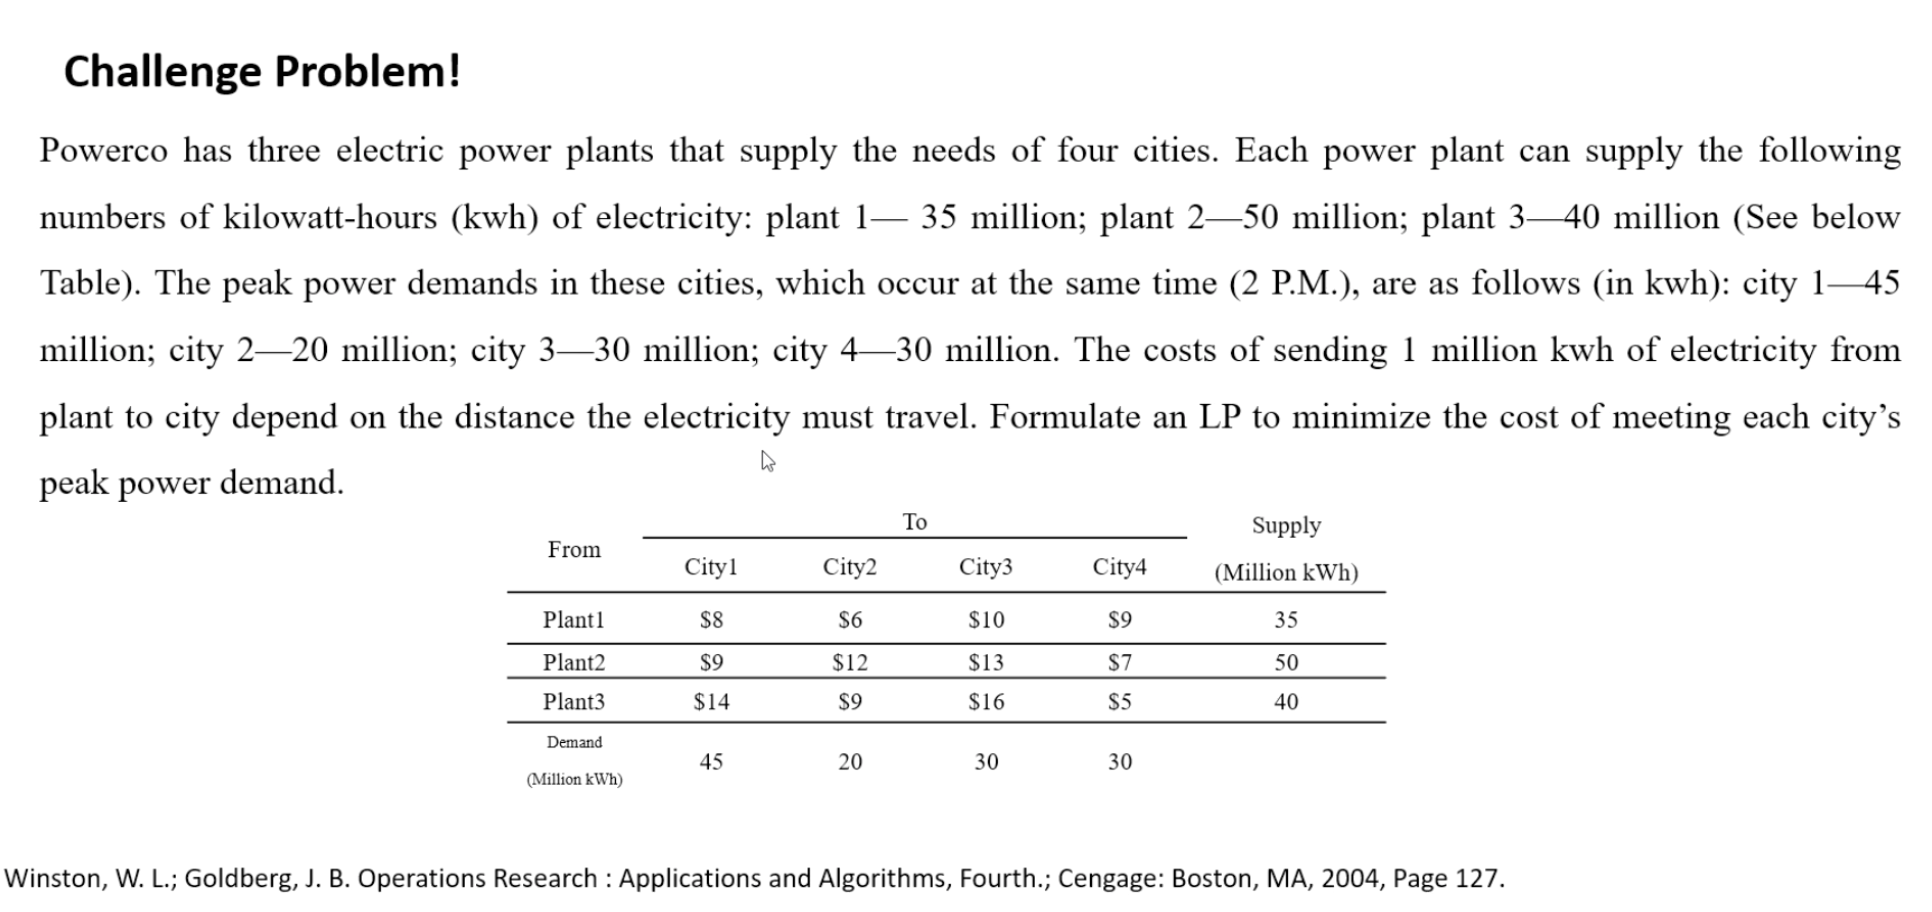

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 4.9 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123941 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Pr

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [3]:
# Define the model
model = pyo.ConcreteModel()

# Define sets
model.i = pyo.RangeSet(1,3)
model.j = pyo.RangeSet(1,4)

# Define parameters
model.S = pyo.Param(model.i, initialize={1:35,2:50,3:40})
S = model.S # Supply 
model.D = pyo.Param(model.j, initialize={1:45,2:20,3:30,4:30})
D = model.D # Demand
model.P = pyo.Param(model.i, model.j, initialize={(1,1):8,(1,2):6,(1,3):10,(1,4):9,
                                                  (2,1):9,(2,2):12,(2,3):13,(2,4):7,
                                                  (3,1):14,(3,2):9,(3,3):16,(3,4):5})
P = model.P # Price

# Decision Variable
model.x = pyo.Var(model.i, model.j, within=pyo.NonNegativeReals)
x = model.x 

# Objective Function
def objective_function(model):
  return sum(sum(x[i,j]*P[i,j] for i in model.i) for j in model.j)
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.minimize)

# Constrains
def cons1(model,i):
  return sum(x[1,j] for j in model.j)<=S[1]
model.Cons1 = pyo.Constraint(model.j,rule=cons1)

def cons2(model,i):
  return sum(x[2,j] for j in model.j)<=S[2]
model.Cons2 = pyo.Constraint(model.j, rule=cons2)

def cons3(model,i):
  return sum(x[3,j] for j in model.j)<=S[3]
model.Cons3 = pyo.Constraint(model.j, rule=cons3)


def cons4(model,j):
  return sum(x[i,1] for i in model.i)>=D[1]
model.Cons4 = pyo.Constraint(model.i,rule=cons4)

def cons5(model,j):
  return sum(x[i,2] for i in model.i)>=D[2]
model.Cons5 = pyo.Constraint(model.i,rule=cons5)

def cons6(model,j):
  return sum(x[i,3] for i in model.i)>=D[3]
model.Cons6 = pyo.Constraint(model.i,rule=cons6)

def cons7(model,j):
  return sum(x[i,4] for i in model.i)>=D[4]
model.Cons7 = pyo.Constraint(model.i,rule=cons7)

# Optimization
Solver = SolverFactory('glpk')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  for j in model.j:
    print("Electricity sent from Plant", i, "to City", j, "= ", x[i,j]())





Problem: 
- Name: unknown
  Lower bound: 1020.0
  Upper bound: 1020.0
  Number of objectives: 1
  Number of constraints: 25
  Number of variables: 13
  Number of nonzeros: 85
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.015503406524658203
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  1020.0
Electricity sent from Plant 1 to City 1 =  0.0
Electricity sent from Plant 1 to City 2 =  10.0
Electricity sent from Plant 1 to City 3 =  25.0
Electricity sent from Plant 1 to City 4 =  0.0
Electricity sent from Plant 2 to City 1 =  45.0
Electricity sent from Plant 2 to City 2 =  0.0
Electricity sent from Plant 2 to City 3 =  5.0
Electricity sent from Plant 2 to City 4 =  0.0
Electricity sent from Plant 3 to City 1 =  0.0
Electricity sent from Plant 3 to City 2 =  10.0
Electricity sent f